<a href="https://colab.research.google.com/github/espartaca75-prog/Optmizacion_dinamica_discreta/blob/main/COD_programaci%C3%B3n_din%C3%A1mica_Ejemplo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejemplo 4

---



Caso 1

---
$α*β$ mayor a 1

---




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

In [2]:
# --- 1. CONFIGURACIÓN DEL PROBLEMA (CICLO DE VIDA) ---
# Objetivo: Maximizar sum(beta^t * ln(ct)) sujeto a st+1 = alpha(st - ct)
T = 10          # Períodos de planificación (años)
s0 = 100000.0      # Riqueza inicial (unidades monetarias)
beta = 0.95     # Factor de descuento (tasa impaciencia)
alpha = 1.2    # Factor de capitalización (1 + r)

# Diccionarios para almacenar las funciones halladas
valor_funciones = {}
politicas_monto = {} # Almacenará la regla de decisión para ct

In [3]:
# --- 2. INDUCCIÓN HACIA ATRÁS  ---
# Condición Terminal: s_{T+1} = 0
valor_funciones[T + 1] = lambda s: 0

print("Iniciando Inducción Hacia Atrás...")

for t in range(T, -1, -1):
    # Ecuación de Bellman: Wt(st) = max { ln(ct) + beta * Wt+1( alpha*(st - ct) ) }
    def objetivo_negativo(c, s_actual, t_idx):
        if c <= 0 or c >= s_actual: return 1e10 # Restricción: el consumo debe ser positivo y menor al ahorro

        utilidad_presente = np.log(c)
        s_siguiente = alpha * (s_actual - c)
        valor_futuro = valor_funciones[t_idx + 1](s_siguiente)

        # Maximizamos el bienestar total de la etapa
        return -(utilidad_presente + beta * valor_futuro)

    # El optimizador busca (ct)
    # Usamos un s_actual de referencia para descubrir la proporción óptima
    s_ref = 100.0
    res = minimize_scalar(objetivo_negativo, args=(s_ref, t), bounds=(0.1, s_ref - 0.1), method='bounded')

    monto_hallado = res.x
    h_t = monto_hallado / s_ref # Extraemos la proporción para aplicarla a cualquier st
    politicas_monto[t] = h_t

    # Actualizamos la función de valor para el periodo t-1
    valor_funciones[t] = lambda s, h=h_t, t_i=t: -objetivo_negativo(h*s, s, t_i)

    print(f"Etapa t={t}: Decisión óptima hallada -> Consumir {h_t*100:.2f}% de la riqueza st")

Iniciando Inducción Hacia Atrás...
Etapa t=10: Decisión óptima hallada -> Consumir 99.90% de la riqueza st
Etapa t=9: Decisión óptima hallada -> Consumir 51.28% de la riqueza st
Etapa t=8: Decisión óptima hallada -> Consumir 35.06% de la riqueza st
Etapa t=7: Decisión óptima hallada -> Consumir 26.96% de la riqueza st
Etapa t=6: Decisión óptima hallada -> Consumir 22.10% de la riqueza st
Etapa t=5: Decisión óptima hallada -> Consumir 18.87% de la riqueza st
Etapa t=4: Decisión óptima hallada -> Consumir 16.57% de la riqueza st
Etapa t=3: Decisión óptima hallada -> Consumir 14.86% de la riqueza st
Etapa t=2: Decisión óptima hallada -> Consumir 13.52% de la riqueza st
Etapa t=1: Decisión óptima hallada -> Consumir 12.46% de la riqueza st
Etapa t=0: Decisión óptima hallada -> Consumir 11.60% de la riqueza st


In [4]:
# --- 3. TRAYECTORIA ÓPTIMA (Fase de Ejecución) ---
s_hist = [s0]
c_hist = []

for t in range(T + 1):
    s_t = s_hist[-1]
    # Se elige el monto ct siguiendo la política descubierta
    c_t = politicas_monto[t] * s_t
    c_hist.append(c_t)

    # Evolución del sistema: st+1 = alpha * (st - ct)
    if t < T:
        s_next = alpha * (s_t - c_t)
        s_hist.append(s_next)

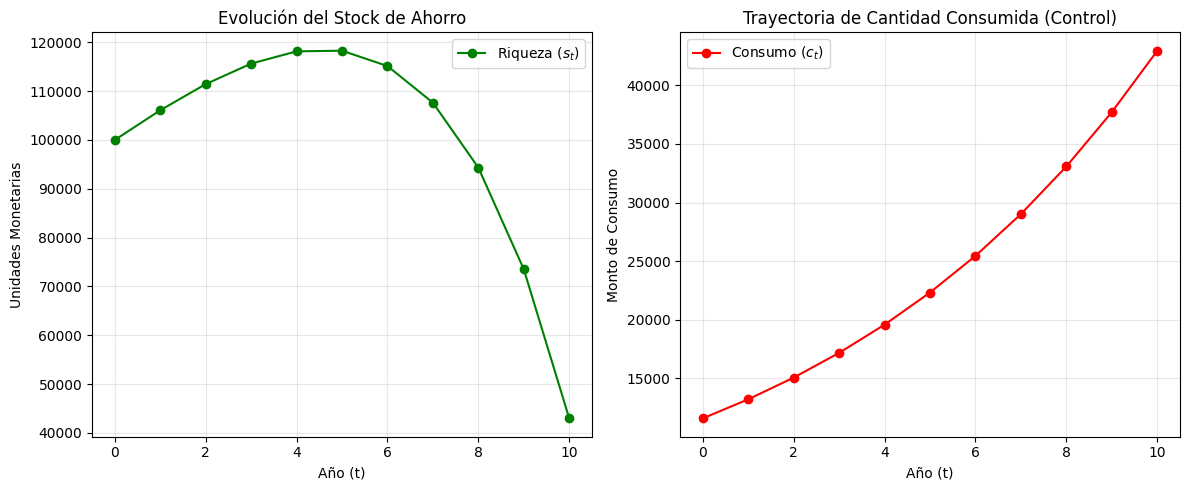

In [5]:
# --- 4. VISUALIZACIÓN DE RESULTADOS ---
plt.figure(figsize=(12, 5))

# Gráfico de la Variable de Estado: Riqueza
plt.subplot(1, 2, 1)
plt.plot(s_hist, 'go-', label='Riqueza ($s_t$)')
plt.title('Evolución del Stock de Ahorro')
plt.xlabel('Año (t)'); plt.ylabel('Unidades Monetarias')
plt.grid(True, alpha=0.3); plt.legend()

# Gráfico de la Variable de Control: Cantidad Consumida
plt.subplot(1, 2, 2)
plt.plot(c_hist, 'ro-', label='Consumo ($c_t$)')
plt.title('Trayectoria de Cantidad Consumida (Control)')
plt.xlabel('Año (t)'); plt.ylabel('Monto de Consumo')
plt.grid(True, alpha=0.3); plt.legend()

plt.tight_layout(); plt.show()

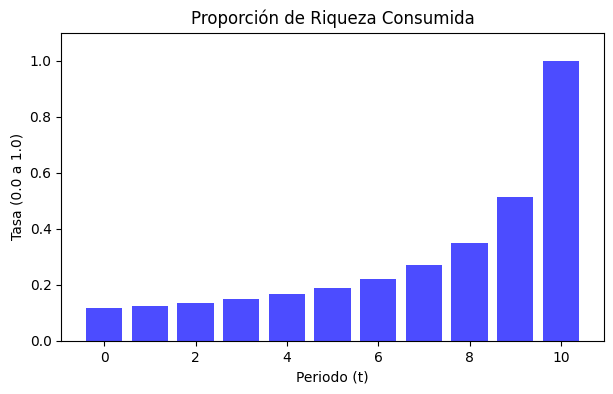

In [6]:
# Gráfico de Tasa de Consumo (u*)
plt.figure(figsize=(7, 4))
plt.bar(range(T + 1), [politicas_monto[t] for t in range(T+1)], color='blue', alpha=0.7)
plt.title('Proporción de Riqueza Consumida')
plt.xlabel('Periodo (t)')
plt.ylabel('Tasa (0.0 a 1.0)')
plt.ylim(0, 1.1)
plt.show()

In [7]:
# --- 5. TABLA DE RESULTADOS ---
df = pd.DataFrame({
    'Año (t)': range(T + 1),
    'Riqueza (st)': s_hist,
    'Consumo (ct)': c_hist,
    'Tasa (ct/st)': [politicas_monto[t] for t in range(T+1)]
})
print("\nRESULTADOS DE LA TRAYECTORIA ÓPTIMA:")
print(df.to_string(index=False))


RESULTADOS DE LA TRAYECTORIA ÓPTIMA:
 Año (t)  Riqueza (st)  Consumo (ct)  Tasa (ct/st)
       0 100000.000000  11595.549858      0.115955
       1 106085.340170  13218.926789      0.124607
       2 111439.696057  15069.576259      0.135226
       3 115644.143758  17179.315375      0.148553
       4 118157.794060  19584.421672      0.165748
       5 118288.046865  22326.241177      0.188745
       6 115154.166826  25451.915428      0.221025
       7 107642.701677  29015.184147      0.269551
       8  94353.021036  33077.307952      0.350570
       9  73530.855700  37708.131800      0.512821
      10  42987.268680  42944.278047      0.999000


In [8]:
# Verificación Regla de Euler: ct+1 / ct = alpha * beta
if len(c_hist) > 1:
    # Calcular las ratios c_{t+1}/c_t
    euler_ratios = [c_hist[i+1] / c_hist[i] for i in range(len(c_hist) - 1)]
    # Tomar la media de las ratios para una verificación representativa
    euler_real = np.mean(euler_ratios)
    euler_teorico = alpha * beta
    print(f"\nVERIFICACIÓN EULER: Real (media) {euler_real:.4f} vs Teórico {euler_teorico:.4f}")


VERIFICACIÓN EULER: Real (media) 1.1399 vs Teórico 1.1400


Caso 2

---
$α*β$ menor a 1

---




In [9]:
# --- 1. CONFIGURACIÓN DEL PROBLEMA (CICLO DE VIDA) ---
# Objetivo: Maximizar sum(beta^t * ln(ct)) sujeto a st+1 = alpha(st - ct)
T = 10          # Períodos de planificación (años)
s0 = 100000.0      # Riqueza inicial (unidades monetarias)
beta = 0.5     # Factor de descuento (tasa impaciencia)
alpha = 1.1    # Factor de capitalización (1 + r)

# Diccionarios para almacenar las funciones halladas
valor_funciones = {}
politicas_monto = {} # Almacenará la regla de decisión para ct

In [10]:
# --- 2. INDUCCIÓN HACIA ATRÁS  ---
# Condición Terminal: s_{T+1} = 0
valor_funciones[T + 1] = lambda s: 0

print("Iniciando Inducción Hacia Atrás...")

for t in range(T, -1, -1):
    # Ecuación de Bellman: Wt(st) = max { ln(ct) + beta * Wt+1( alpha*(st - ct) ) }
    def objetivo_negativo(c, s_actual, t_idx):
        if c <= 0 or c >= s_actual: return 1e10 # Restricción: el consumo debe ser positivo y menor al ahorro

        utilidad_presente = np.log(c)
        s_siguiente = alpha * (s_actual - c)
        valor_futuro = valor_funciones[t_idx + 1](s_siguiente)

        # Maximizamos el bienestar total de la etapa
        return -(utilidad_presente + beta * valor_futuro)

    # El optimizador busca (ct)
    # Usamos un s_actual de referencia para descubrir la proporción óptima
    s_ref = 100.0
    res = minimize_scalar(objetivo_negativo, args=(s_ref, t), bounds=(0.1, s_ref - 0.1), method='bounded')

    monto_hallado = res.x
    h_t = monto_hallado / s_ref # Extraemos la proporción para aplicarla a cualquier st
    politicas_monto[t] = h_t

    # Actualizamos la función de valor para el periodo t-1
    valor_funciones[t] = lambda s, h=h_t, t_i=t: -objetivo_negativo(h*s, s, t_i)

    print(f"Etapa t={t}: Decisión óptima hallada -> Consumir {h_t*100:.2f}% de la riqueza st")

Iniciando Inducción Hacia Atrás...
Etapa t=10: Decisión óptima hallada -> Consumir 99.90% de la riqueza st
Etapa t=9: Decisión óptima hallada -> Consumir 66.67% de la riqueza st
Etapa t=8: Decisión óptima hallada -> Consumir 57.14% de la riqueza st
Etapa t=7: Decisión óptima hallada -> Consumir 53.33% de la riqueza st
Etapa t=6: Decisión óptima hallada -> Consumir 51.61% de la riqueza st
Etapa t=5: Decisión óptima hallada -> Consumir 50.79% de la riqueza st
Etapa t=4: Decisión óptima hallada -> Consumir 50.39% de la riqueza st
Etapa t=3: Decisión óptima hallada -> Consumir 50.20% de la riqueza st
Etapa t=2: Decisión óptima hallada -> Consumir 50.10% de la riqueza st
Etapa t=1: Decisión óptima hallada -> Consumir 50.05% de la riqueza st
Etapa t=0: Decisión óptima hallada -> Consumir 50.02% de la riqueza st


In [11]:
# --- 3. TRAYECTORIA ÓPTIMA (Fase de Ejecución) ---
s_hist = [s0]
c_hist = []

for t in range(T + 1):
    s_t = s_hist[-1]
    # Se elige el monto ct siguiendo la política descubierta
    c_t = politicas_monto[t] * s_t
    c_hist.append(c_t)

    # Evolución del sistema: st+1 = alpha * (st - ct)
    if t < T:
        s_next = alpha * (s_t - c_t)
        s_hist.append(s_next)

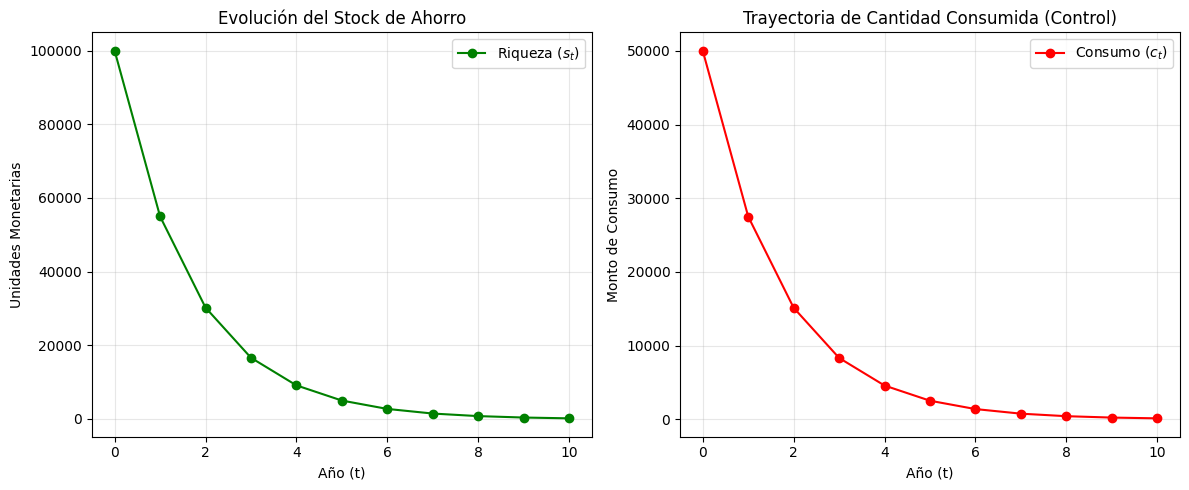

In [12]:
# --- 4. VISUALIZACIÓN DE RESULTADOS ---
plt.figure(figsize=(12, 5))

# Gráfico de la Variable de Estado: Riqueza
plt.subplot(1, 2, 1)
plt.plot(s_hist, 'go-', label='Riqueza ($s_t$)')
plt.title('Evolución del Stock de Ahorro')
plt.xlabel('Año (t)'); plt.ylabel('Unidades Monetarias')
plt.grid(True, alpha=0.3); plt.legend()

# Gráfico de la Variable de Control: Cantidad Consumida
plt.subplot(1, 2, 2)
plt.plot(c_hist, 'ro-', label='Consumo ($c_t$)')
plt.title('Trayectoria de Cantidad Consumida (Control)')
plt.xlabel('Año (t)'); plt.ylabel('Monto de Consumo')
plt.grid(True, alpha=0.3); plt.legend()

plt.tight_layout(); plt.show()

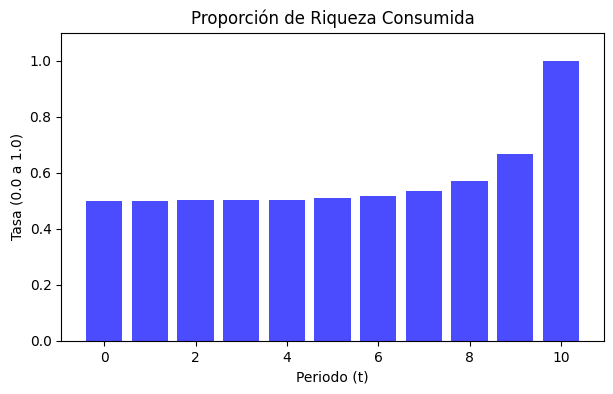

In [13]:
# Gráfico de Tasa de Consumo (u*)
plt.figure(figsize=(7, 4))
plt.bar(range(T + 1), [politicas_monto[t] for t in range(T+1)], color='blue', alpha=0.7)
plt.title('Proporción de Riqueza Consumida')
plt.xlabel('Periodo (t)')
plt.ylabel('Tasa (0.0 a 1.0)')
plt.ylim(0, 1.1)
plt.show()

In [14]:
# --- 5. TABLA DE RESULTADOS ---
df = pd.DataFrame({
    'Año (t)': range(T + 1),
    'Riqueza (st)': s_hist,
    'Consumo (ct)': c_hist,
    'Tasa (ct/st)': [politicas_monto[t] for t in range(T+1)]
})
print("\nRESULTADOS DE LA TRAYECTORIA ÓPTIMA:")
print(df.to_string(index=False))


RESULTADOS DE LA TRAYECTORIA ÓPTIMA:
 Año (t)  Riqueza (st)  Consumo (ct)  Tasa (ct/st)
       0 100000.000000  50024.425991      0.500244
       1  54973.131410  27513.434292      0.500489
       2  30205.666829  15132.388862      0.500978
       3  16580.605764   8322.813874      0.501961
       4   9083.571079   4577.547633      0.503937
       5   4956.625791   2517.651206      0.507937
       6   2682.872043   1384.708199      0.516129
       7   1427.980228    761.589458      0.533333
       8    733.029848    418.874204      0.571429
       9    345.571209    230.380806      0.666667
      10    126.709443    126.582724      0.999000


In [15]:
# Verificación Regla de Euler: ct+1 / ct = alpha * beta
if len(c_hist) > 1:
    # Calcular las ratios c_{t+1}/c_t
    euler_ratios = [c_hist[i+1] / c_hist[i] for i in range(len(c_hist) - 1)]
    # Tomar la media de las ratios para una verificación representativa
    euler_real = np.mean(euler_ratios)
    euler_teorico = alpha * beta
    print(f"\nVERIFICACIÓN EULER: Real (media) {euler_real:.4f} vs Teórico {euler_teorico:.4f}")


VERIFICACIÓN EULER: Real (media) 0.5499 vs Teórico 0.5500


Caso 3

---

$α*β$ igual a 1

---



In [16]:
# --- 1. CONFIGURACIÓN DEL PROBLEMA (CICLO DE VIDA) ---
# Objetivo: Maximizar sum(beta^t * ln(ct)) sujeto a st+1 = alpha(st - ct)
T = 10          # Períodos de planificación (años)
s0 = 100000.0      # Riqueza inicial (unidades monetarias)
beta = 0.8     # Factor de descuento (tasa impaciencia)
alpha = 1.25    # Factor de capitalización (1 + r)

# Diccionarios para almacenar las funciones halladas
valor_funciones = {}
politicas_monto = {} # Almacenará la regla de decisión para ct

In [17]:
# --- 2. INDUCCIÓN HACIA ATRÁS  ---
# Condición Terminal: s_{T+1} = 0
valor_funciones[T + 1] = lambda s: 0

print("Iniciando Inducción Hacia Atrás...")

for t in range(T, -1, -1):
    # Ecuación de Bellman: Wt(st) = max { ln(ct) + beta * Wt+1( alpha*(st - ct) ) }
    def objetivo_negativo(c, s_actual, t_idx):
        if c <= 0 or c >= s_actual: return 1e10 # Restricción: el consumo debe ser positivo y menor al ahorro

        utilidad_presente = np.log(c)
        s_siguiente = alpha * (s_actual - c)
        valor_futuro = valor_funciones[t_idx + 1](s_siguiente)

        # Maximizamos el bienestar total de la etapa
        return -(utilidad_presente + beta * valor_futuro)

    # El optimizador busca (ct)
    # Usamos un s_actual de referencia para descubrir la proporción óptima
    s_ref = 100.0
    res = minimize_scalar(objetivo_negativo, args=(s_ref, t), bounds=(0.1, s_ref - 0.1), method='bounded')

    monto_hallado = res.x
    h_t = monto_hallado / s_ref # Extraemos la proporción para aplicarla a cualquier st
    politicas_monto[t] = h_t

    # Actualizamos la función de valor para el periodo t-1
    valor_funciones[t] = lambda s, h=h_t, t_i=t: -objetivo_negativo(h*s, s, t_i)

    print(f"Etapa t={t}: Decisión óptima hallada -> Consumir {h_t*100:.2f}% de la riqueza st")

Iniciando Inducción Hacia Atrás...
Etapa t=10: Decisión óptima hallada -> Consumir 99.90% de la riqueza st
Etapa t=9: Decisión óptima hallada -> Consumir 55.56% de la riqueza st
Etapa t=8: Decisión óptima hallada -> Consumir 40.98% de la riqueza st
Etapa t=7: Decisión óptima hallada -> Consumir 33.88% de la riqueza st
Etapa t=6: Decisión óptima hallada -> Consumir 29.75% de la riqueza st
Etapa t=5: Decisión óptima hallada -> Consumir 27.11% de la riqueza st
Etapa t=4: Decisión óptima hallada -> Consumir 25.31% de la riqueza st
Etapa t=3: Decisión óptima hallada -> Consumir 24.03% de la riqueza st
Etapa t=2: Decisión óptima hallada -> Consumir 23.10% de la riqueza st
Etapa t=1: Decisión óptima hallada -> Consumir 22.41% de la riqueza st
Etapa t=0: Decisión óptima hallada -> Consumir 21.88% de la riqueza st


In [18]:
# --- 3. TRAYECTORIA ÓPTIMA (Fase de Ejecución) ---
s_hist = [s0]
c_hist = []

for t in range(T + 1):
    s_t = s_hist[-1]
    # Se elige el monto ct siguiendo la política descubierta
    c_t = politicas_monto[t] * s_t
    c_hist.append(c_t)

    # Evolución del sistema: st+1 = alpha * (st - ct)
    if t < T:
        s_next = alpha * (s_t - c_t)
        s_hist.append(s_next)

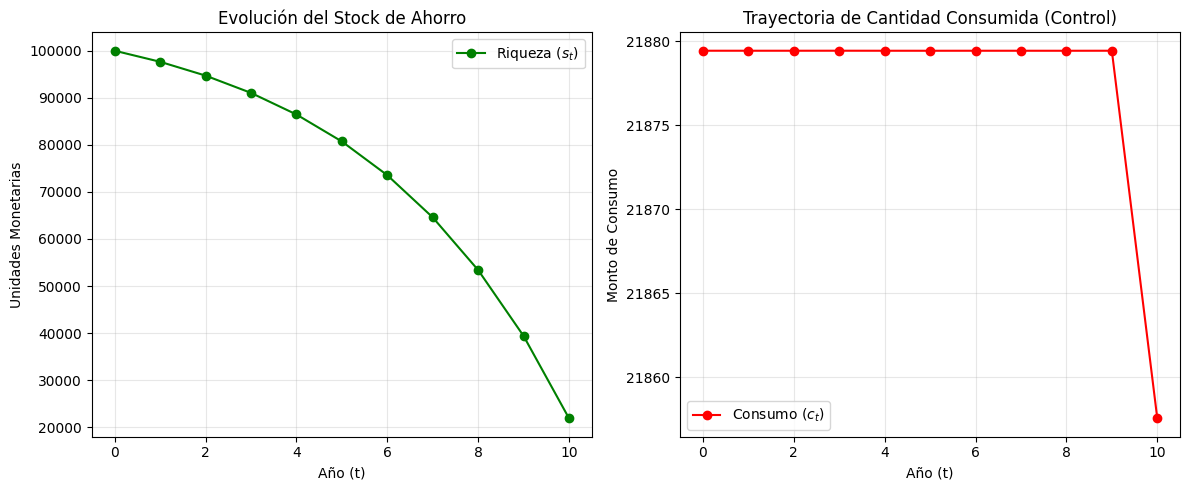

In [19]:
# --- 4. VISUALIZACIÓN DE RESULTADOS ---
plt.figure(figsize=(12, 5))

# Gráfico de la Variable de Estado: Riqueza
plt.subplot(1, 2, 1)
plt.plot(s_hist, 'go-', label='Riqueza ($s_t$)')
plt.title('Evolución del Stock de Ahorro')
plt.xlabel('Año (t)'); plt.ylabel('Unidades Monetarias')
plt.grid(True, alpha=0.3); plt.legend()

# Gráfico de la Variable de Control: Cantidad Consumida
plt.subplot(1, 2, 2)
plt.plot(c_hist, 'ro-', label='Consumo ($c_t$)')
plt.title('Trayectoria de Cantidad Consumida (Control)')
plt.xlabel('Año (t)'); plt.ylabel('Monto de Consumo')
plt.grid(True, alpha=0.3); plt.legend()

plt.tight_layout(); plt.show()

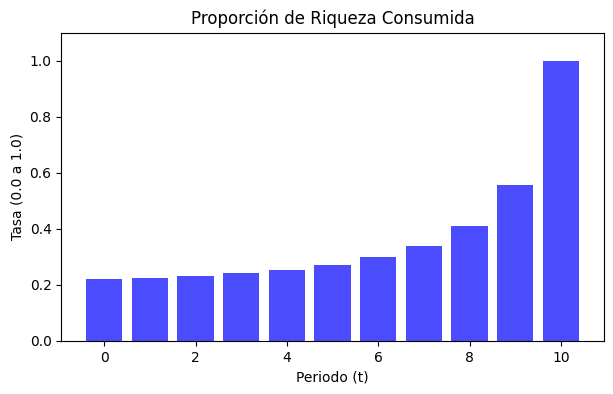

In [20]:
# Gráfico de Tasa de Consumo (u*)
plt.figure(figsize=(7, 4))
plt.bar(range(T + 1), [politicas_monto[t] for t in range(T+1)], color='blue', alpha=0.7)
plt.title('Proporción de Riqueza Consumida')
plt.xlabel('Periodo (t)')
plt.ylabel('Tasa (0.0 a 1.0)')
plt.ylim(0, 1.1)
plt.show()

In [21]:
# --- 5. TABLA DE RESULTADOS ---
df = pd.DataFrame({
    'Año (t)': range(T + 1),
    'Riqueza (st)': s_hist,
    'Consumo (ct)': c_hist,
    'Tasa (ct/st)': [politicas_monto[t] for t in range(T+1)]
})
print("\nRESULTADOS DE LA TRAYECTORIA ÓPTIMA:")
print(df.to_string(index=False))


RESULTADOS DE LA TRAYECTORIA ÓPTIMA:
 Año (t)  Riqueza (st)  Consumo (ct)  Tasa (ct/st)
       0 100000.000000  21879.429133      0.218794
       1  97650.713584  21879.428717      0.224058
       2  94714.106084  21879.428437      0.231005
       3  91043.347058  21879.429984      0.240319
       4  86454.896342  21879.427922      0.253073
       5  80719.335524  21879.427316      0.271056
       6  73549.885261  21879.428082      0.297477
       7  64588.071473  21879.427962      0.338753
       8  53385.804389  21879.427086      0.409836
       9  39382.971628  21879.428887      0.555556
      10  21879.428427  21857.547286      0.999000


In [22]:
# Verificación Regla de Euler: ct+1 / ct = alpha * beta
if len(c_hist) > 1:
    # Calcular las ratios c_{t+1}/c_t
    euler_ratios = [c_hist[i+1] / c_hist[i] for i in range(len(c_hist) - 1)]
    # Tomar la media de las ratios para una verificación representativa
    euler_real = np.mean(euler_ratios)
    euler_teorico = alpha * beta
    print(f"\nVERIFICACIÓN EULER: Real (media) {euler_real:.4f} vs Teórico {euler_teorico:.4f}")


VERIFICACIÓN EULER: Real (media) 0.9999 vs Teórico 1.0000
